In [1]:
try:
    import langdetect
except:
    !pip install langdetect
    import langdetect

import json
import matplotlib.pyplot as plt

In [2]:
with open("../parse_data/repo_to_prompts.json", "r") as f:
    file = f.read()
    prompts = json.loads(file)

In [3]:
freq = {}
for key in prompts.keys():
    repo_prompts = prompts[key]
    for prompt in repo_prompts:
        try:
            lang = langdetect.detect(prompt)

            if lang in freq:
                freq[lang] += 1
            else:
                freq[lang] = 1
            
        except:
                if "error" in freq:
                    freq["error"] += 1
                else:
                    freq["error"] = 1

In [4]:
# sort frequency map
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)}
freq

{'en': 958,
 'zh-cn': 78,
 'fr': 41,
 'ja': 16,
 'ko': 6,
 'ro': 6,
 'ca': 5,
 'vi': 4,
 'no': 3,
 'tr': 2,
 'pt': 2,
 'pl': 1,
 'lt': 1,
 'it': 1,
 'et': 1,
 'error': 1,
 'tl': 1}

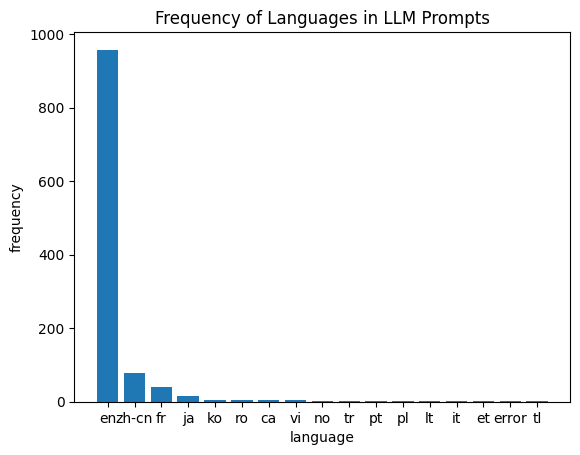

In [7]:
langs = freq.keys()
counts = freq.values()

plt.xlabel("language")
plt.ylabel("frequency")
plt.title("Frequency of Languages in LLM Prompts")
plt.bar(langs, counts)
plt.show()